In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
import os
path = '/Users/parkerjiang/Documents/GitHub/Fall2022CapstoneProject/data/'
path

'/Users/parkerjiang/Documents/GitHub/Fall2022CapstoneProject/data/'

In [28]:
household_df = pd.read_csv(path+"household/household_data_1min_singleindex.csv")
timeseries_df = pd.read_csv(path+"timeseries/time_series_15min_singleindex.csv")
weather_df = pd.read_csv(path+"weather/weather_data.csv")

/Users/parkerjiang/miniforge3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
# household_df.isna().sum()
household = household_df.copy()
# household.columns

In [7]:
# timeseries_df.isna().sum()
new_timeseries_cL = []
for c in timeseries_df.columns:
    if c[:2] == 'DE' or c in ["utc_timestamp", "cet_cest_timestamp"]:
        new_timeseries_cL.append(c)
timeseries = timeseries_df[new_timeseries_cL]

In [29]:
# weather_df.isna().sum()
new_weather_cL = []
for c in weather_df.columns:
    if c[:2] == 'DE' or c in ["utc_timestamp"]:
        new_weather_cL.append(c)
weather = weather_df[new_weather_cL]

In [30]:
weather.columns

Index(['utc_timestamp', 'DE_temperature', 'DE_radiation_direct_horizontal',
       'DE_radiation_diffuse_horizontal'],
      dtype='object')

## Weather

In [31]:
def return_time(df):
    return pd.to_datetime(df["utc_timestamp"])
def get_year(df):
    return df.utc_timestamp.year
weather['utc_timestamp'] = weather.apply(return_time, axis = 1)
weather['year'] = weather.apply(get_year, axis = 1)

/var/folders/yn/3t6ngw9x5093nbw_87n8y45h0000gn/T/ipykernel_41001/3468526062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['utc_timestamp'] = weather.apply(return_time, axis = 1)
/var/folders/yn/3t6ngw9x5093nbw_87n8y45h0000gn/T/ipykernel_41001/3468526062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['year'] = weather.apply(get_year, axis = 1)


Text(0, 0.5, 'temperature')

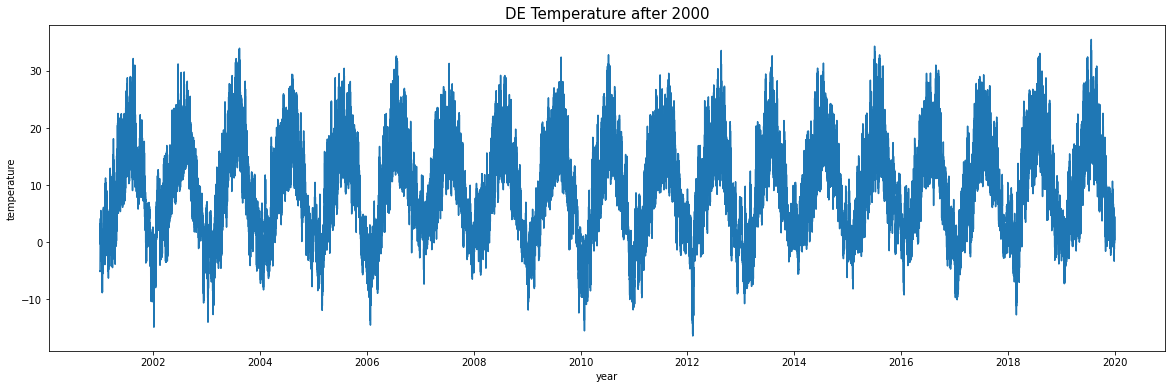

In [54]:
weather_2010 = weather[weather['year']>2000]
date = pd.to_datetime(weather_2010["utc_timestamp"])
value = weather_2010["DE_temperature"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date, value);
ax.set_title("DE Temperature after 2000", fontsize = 15)
ax.set_xlabel("year", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

Text(0, 0.5, 'temperature')

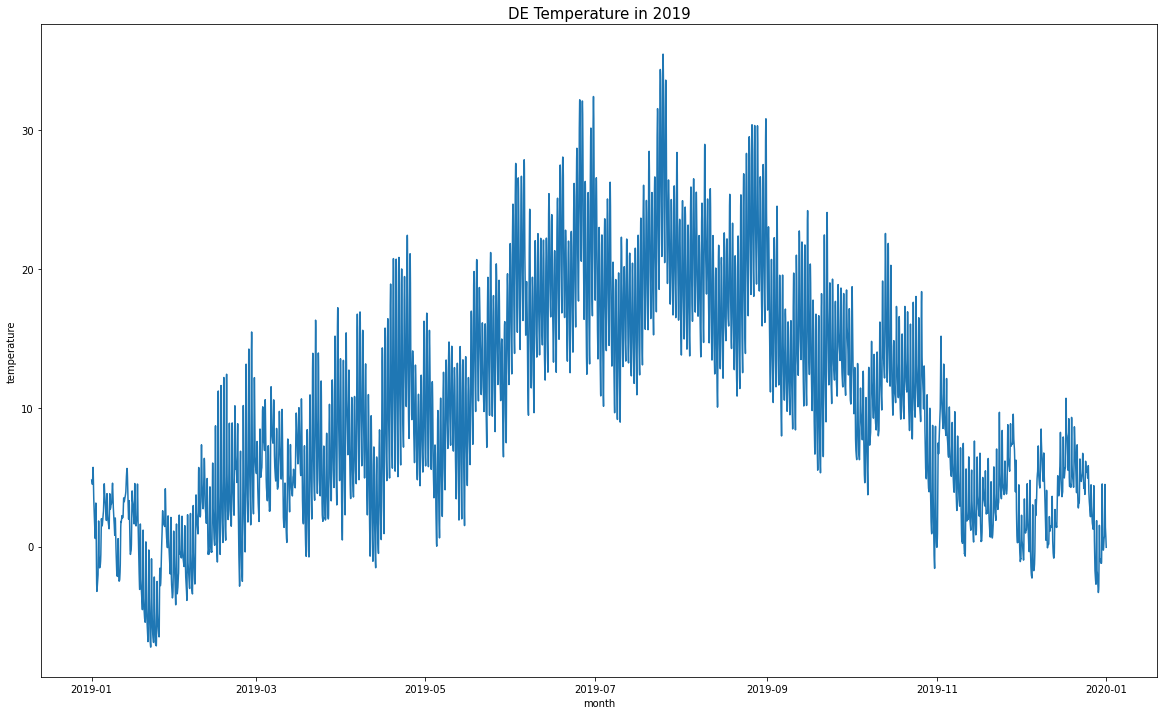

In [55]:
weather_cut = weather[weather['year']>=2019]
date = pd.to_datetime(weather_cut["utc_timestamp"])
value = weather_cut["DE_temperature"]
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(date, value);
ax.set_title("DE Temperature in 2019", fontsize = 15)
ax.set_xlabel("month", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

In [24]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse

# weather_timeseries = weather_2010[['utc_timestamp','DE_temperature']]
# weather_timeseries = weather_timeseries.set_index("utc_timestamp")

# # Additive Decomposition
# add = seasonal_decompose(weather_timeseries['DE_temperature'], model='additive', extrapolate_trend='freq')

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

## Household

In [99]:
industrial1_cL = ['utc_timestamp', 'cet_cest_timestamp']
industrial2_cL = ['utc_timestamp', 'cet_cest_timestamp']
industrial3_cL = ['utc_timestamp', 'cet_cest_timestamp']
public1_cL = ['utc_timestamp', 'cet_cest_timestamp']
public2_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential1_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential2_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential3_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential4_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential5_cL = ['utc_timestamp', 'cet_cest_timestamp']
residential6_cL = ['utc_timestamp', 'cet_cest_timestamp']
for c in household.columns:
    if 'industrial1' in c:
        industrial1_cL.append(c)
    if 'industrial2' in c:
        industrial2_cL.append(c)
    if 'industrial3' in c:
        industrial3_cL.append(c)
    if 'public1' in c:
        public1_cL.append(c)
    if 'public2' in c:
        public2_cL.append(c)
    if 'residential1' in c:
        residential1_cL.append(c)
    if 'residential2' in c:
        residential2_cL.append(c)
    if 'residential3' in c:
        residential3_cL.append(c)
    if 'residential4' in c:
        residential4_cL.append(c)
    if 'residential5' in c:
        residential5_cL.append(c)
    if 'residential6' in c:
        residential6_cL.append(c)
industrial1 = household[industrial1_cL]
industrial2 = household[industrial2_cL]
industrial3 = household[industrial3_cL]
public1 = household[public1_cL]
public2 = household[public2_cL]
residential1 = household[residential1_cL]
residential2 = household[residential2_cL]
residential3 = household[residential3_cL]
residential4 = household[residential4_cL]
residential5 = household[residential5_cL]
residential6 = household[residential6_cL]

In [116]:
dirty_household_dfL = [industrial1, industrial2, industrial3,
                      public1, public2,
                      residential1, residential2, residential3, residential4, residential5, residential6]
nameL = ['industrial1', 'industrial2', 'industrial3',
        'public1', 'public2',
        'residential1', 'residential2', 'residential3', 'residential4', 'residential5', 'residential6']

household_dfL = []
for i,df in enumerate(dirty_household_dfL):
    clean_df = df.dropna(axis=0, subset=[c for c in df.columns if c not in ['utc_timestamp', 'cet_cest_timestamp']], how='all')
    clean_df.name = nameL[i]
    household_dfL.append(clean_df)

In [117]:
for df in household_dfL:
    print(df.name)
    print(df.shape, df.isna().sum())

industrial1
(1037256, 5) utc_timestamp                        0
cet_cest_timestamp                   0
DE_KN_industrial1_grid_import    51333
DE_KN_industrial1_pv_1               2
DE_KN_industrial1_pv_2               2
dtype: int64
industrial2
(851571, 6) utc_timestamp                              0
cet_cest_timestamp                         0
DE_KN_industrial2_grid_import         174892
DE_KN_industrial2_pv                  131613
DE_KN_industrial2_storage_charge      266446
DE_KN_industrial2_storage_decharge    266446
dtype: int64
industrial3
(861580, 22) utc_timestamp                               0
cet_cest_timestamp                          0
DE_KN_industrial3_area_offices             36
DE_KN_industrial3_area_room_1              36
DE_KN_industrial3_area_room_2              36
DE_KN_industrial3_area_room_3               0
DE_KN_industrial3_area_room_4               0
DE_KN_industrial3_compressor               36
DE_KN_industrial3_cooling_aggregate        36
DE_KN_industrial3_coo

In [119]:
for df in household_dfL:
    df['utc_timestamp'] = df.apply(return_time, axis = 1)
    df['year'] = df.apply(get_year, axis = 1)

/var/folders/yn/3t6ngw9x5093nbw_87n8y45h0000gn/T/ipykernel_41001/2316735249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utc_timestamp'] = df.apply(return_time, axis = 1)
/var/folders/yn/3t6ngw9x5093nbw_87n8y45h0000gn/T/ipykernel_41001/2316735249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.apply(get_year, axis = 1)
/var/folders/yn/3t6ngw9x5093nbw_87n8y45h0000gn/T/ipykernel_41001/2316735249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

/var/folders/yn/3t6ngw9x5093nbw_87n8y45h0000gn/T/ipykernel_41001/2316735249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utc_timestamp'] = df.apply(return_time, axis = 1)
/var/folders/yn/3t6ngw9x5093nbw_87n8y45h0000gn/T/ipykernel_41001/2316735249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.apply(get_year, axis = 1)


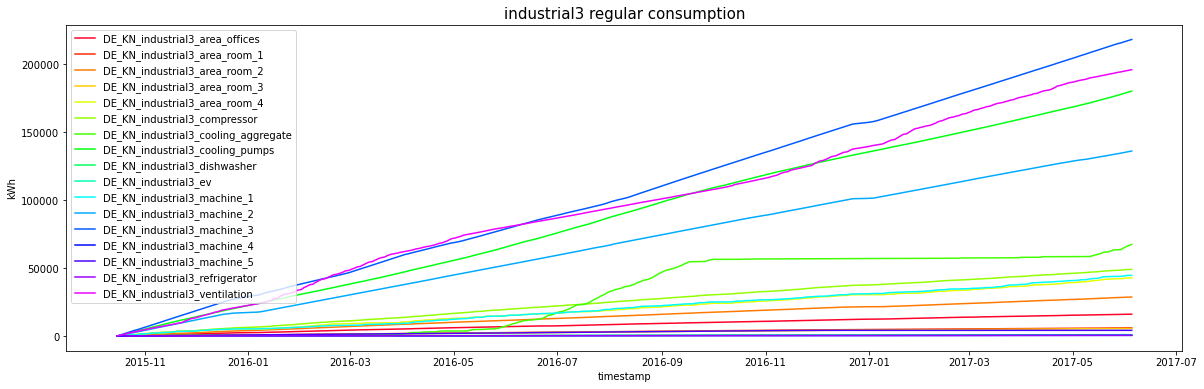

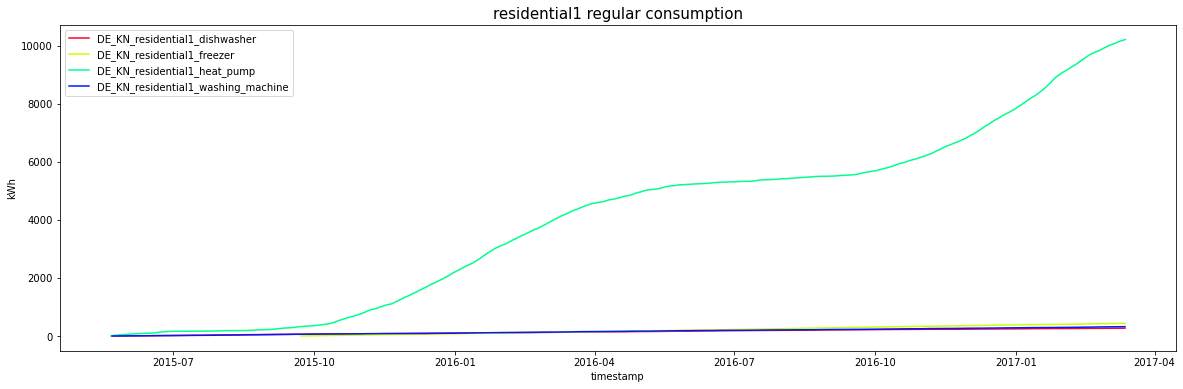

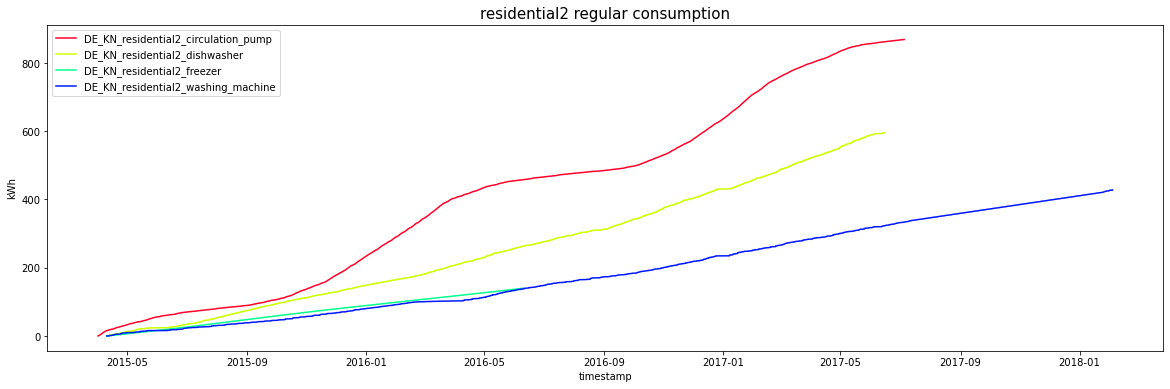

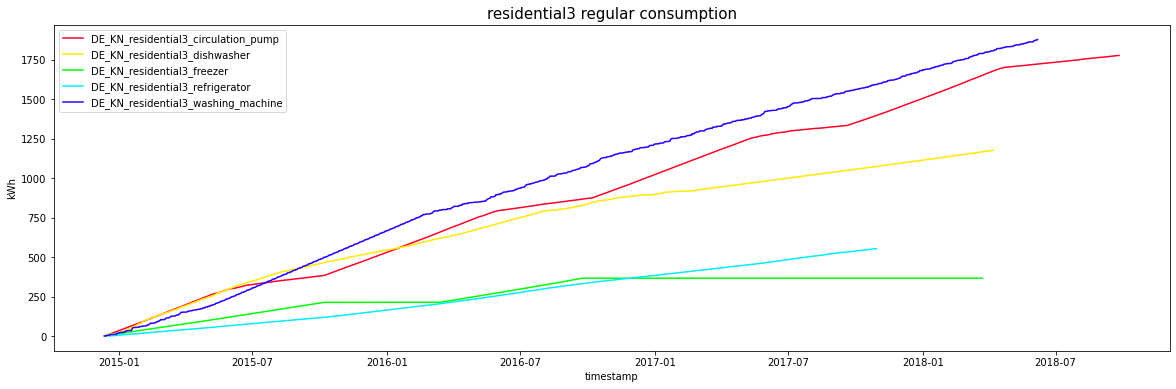

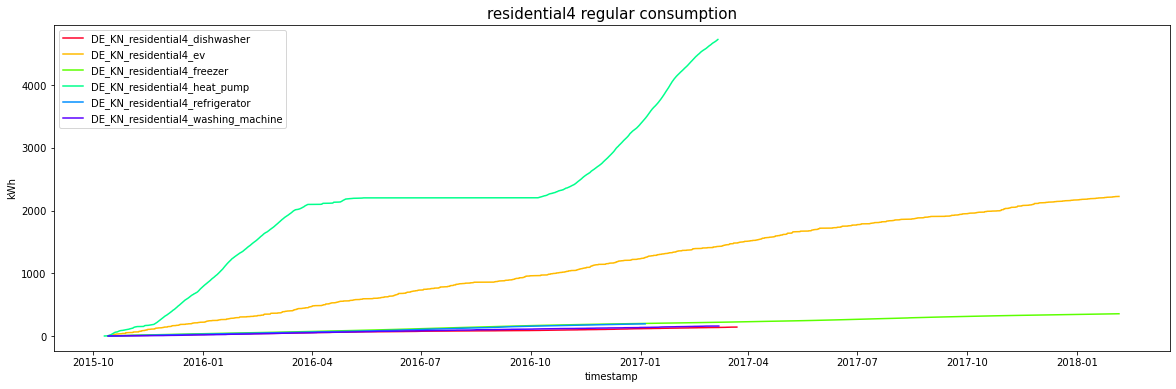

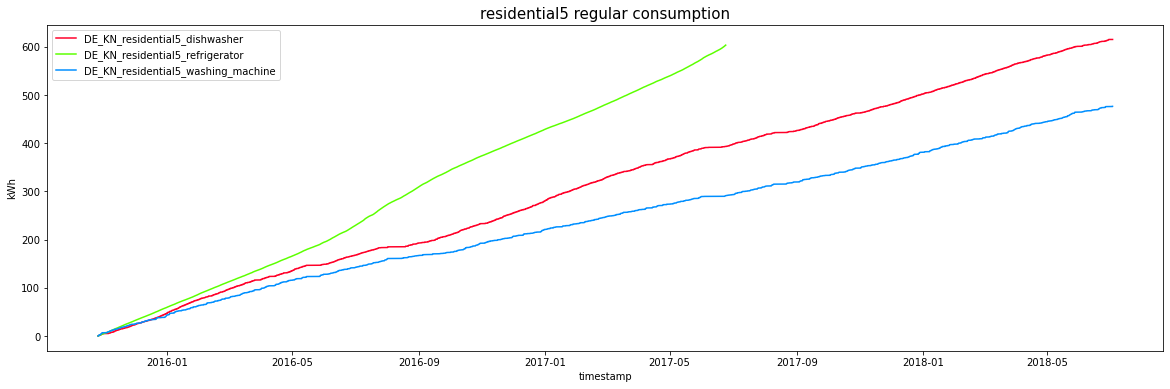

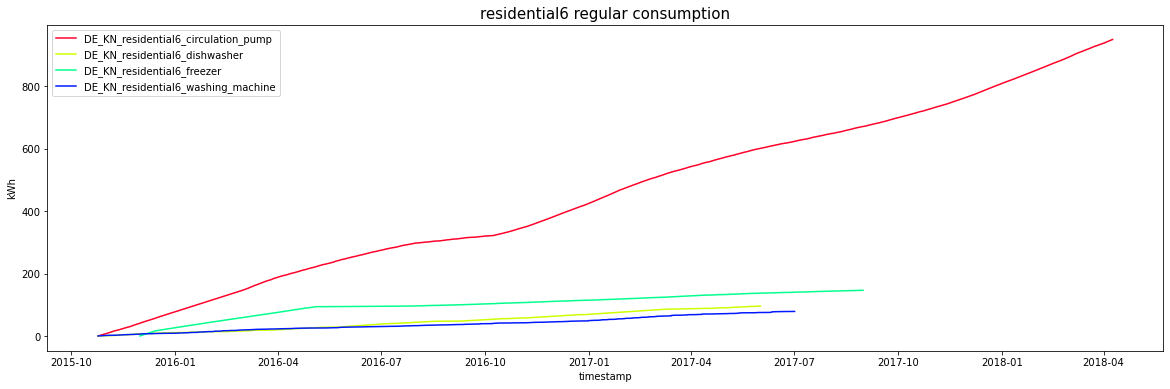

In [128]:
for df in household_dfL:
    date = df["utc_timestamp"]
    cm = plt.get_cmap('gist_rainbow')
    metrics = [c for c in df.columns if c not in ["utc_timestamp", "cet_cest_timestamp","year"]
               and 'grid' not in c and 'charge' not in c and 'pv' not in c]
    if len(metrics) == 0:
        continue
    fig, ax = plt.subplots(figsize=(20, 6))
    color_map = [cm(1.*i/len(metrics)) for i in range(len(metrics))]
    for i,c in enumerate(metrics):
        value = df[c]
        ax.plot(date, value, color = color_map[i], label = c)
    ax.set_title("{} regular consumption".format(df.name), fontsize = 15)
    ax.set_xlabel("timestamp", fontsize = 10)
    ax.set_ylabel("kWh", fontsize = 10)
    ax.legend(loc="upper left")
    plt.show()

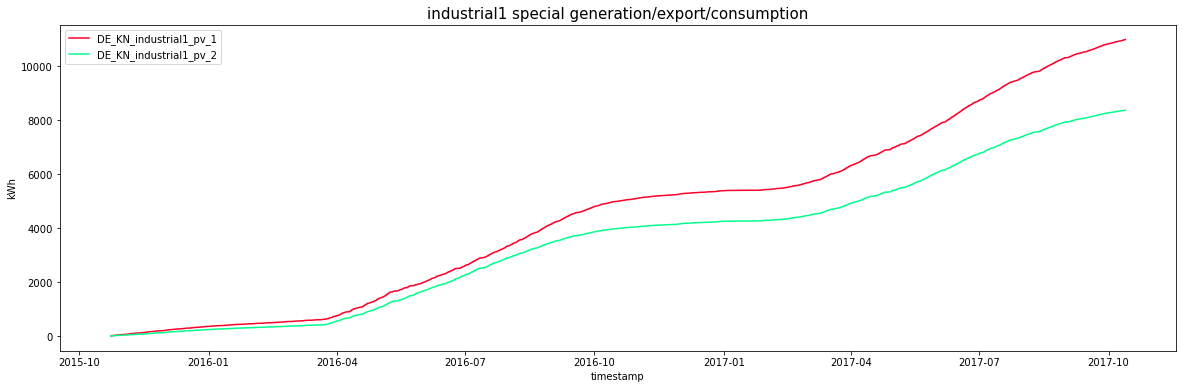

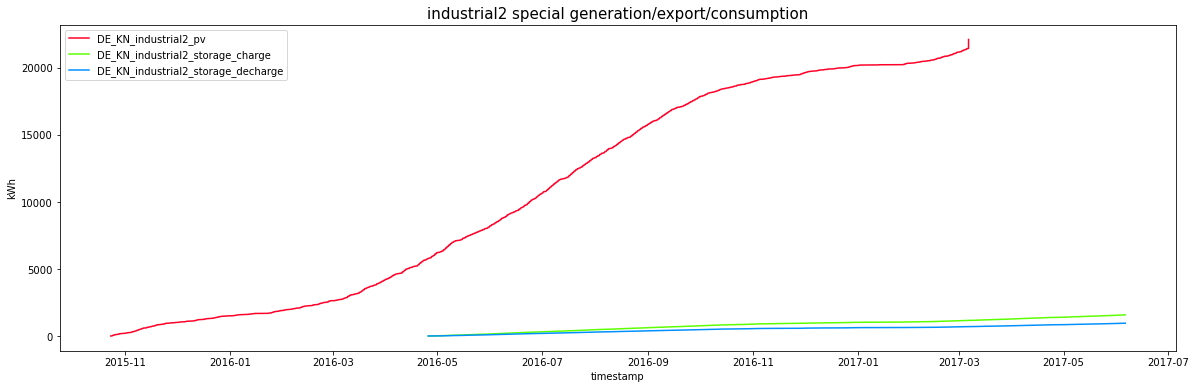

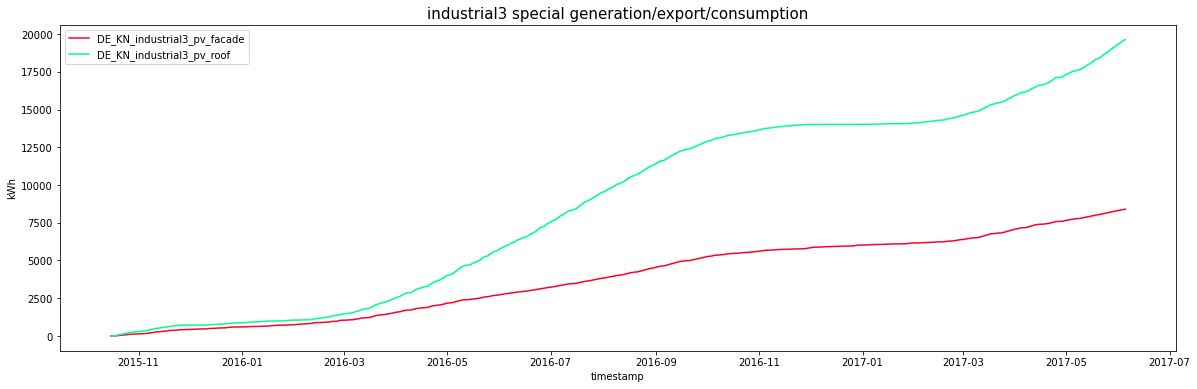

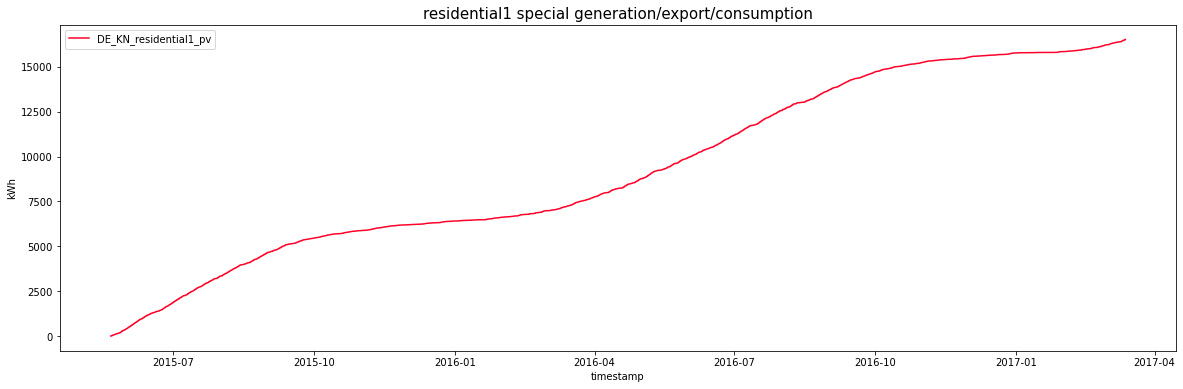

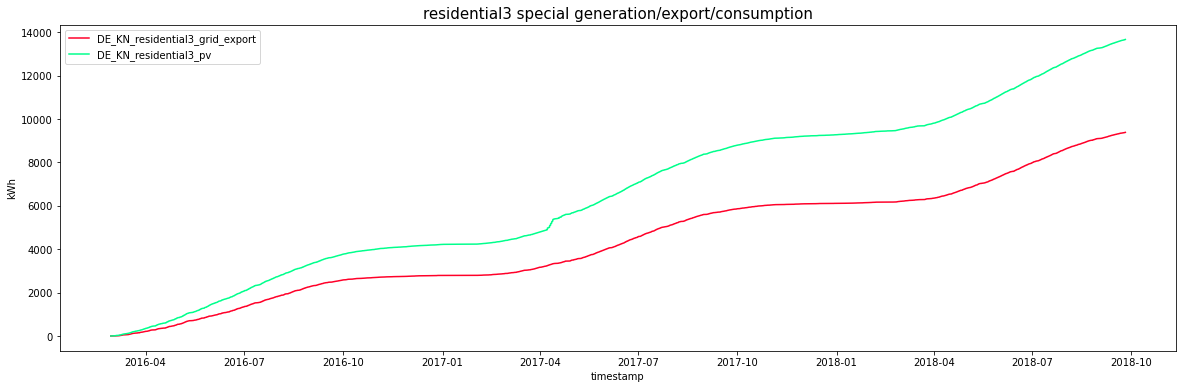

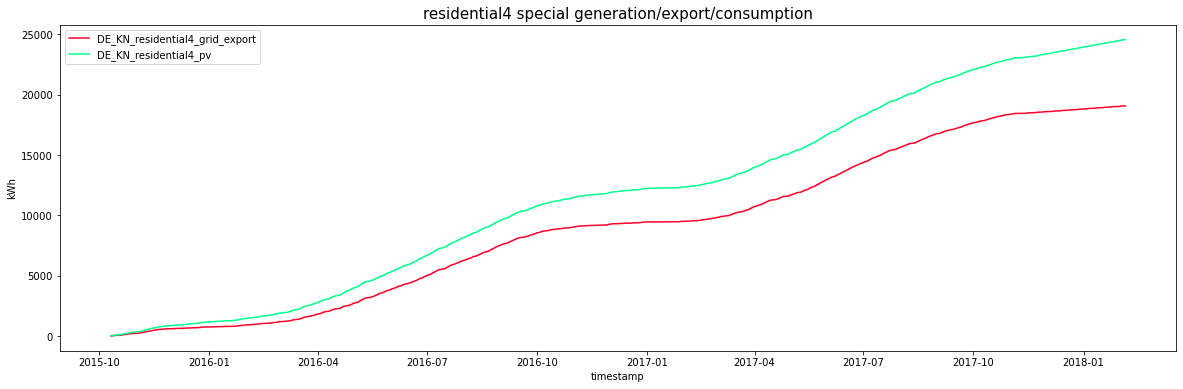

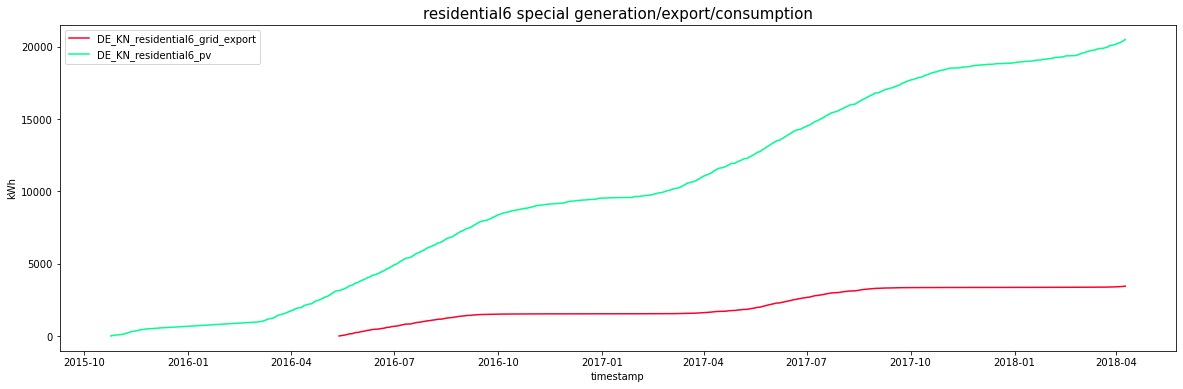

In [129]:
for df in household_dfL:
    date = df["utc_timestamp"]
    cm = plt.get_cmap('gist_rainbow')
    metrics = [c for c in df.columns if c not in ["utc_timestamp", "cet_cest_timestamp","year"]
               and ('grid_export' in c or 'charge' in c or 'pv' in c) and 'grid_import' not in c]
    if len(metrics) == 0:
        continue
    fig, ax = plt.subplots(figsize=(20, 6))
    color_map = [cm(1.*i/len(metrics)) for i in range(len(metrics))]
    for i,c in enumerate(metrics):
        value = df[c]
        ax.plot(date, value, color = color_map[i], label = c)
    ax.set_title("{} special generation/export/consumption".format(df.name), fontsize = 15)
    ax.set_xlabel("timestamp", fontsize = 10)
    ax.set_ylabel("kWh", fontsize = 10)
    ax.legend(loc="upper left")
    plt.show()